

**(a) Gradient ascent and descent algorithm.**

**(b) Newton Method.**

In [ ]:
pip install sympy

In [ ]:
import numpy as np
from sympy import symbols, lambdify

x, y = symbols('x y')
function = x*y + 4*y - 3*x**2 - y**2

In [ ]:
def gradient(function, X, Y):
    diff_x = lambdify((x, y), function.diff(x))
    diff_y = lambdify((x, y), function.diff(y))
    return diff_x(X, Y), diff_y(X, Y)

**Steepest Descent And Ascent**

In [ ]:
learning_rate = 0.01


def steepest_descent(function, starting_point, epochs):
    X_new = [starting_point[0]]
    Y_new = [starting_point[1]]
    function_values = [lambdify((x, y), function)(X_new[0], Y_new[0])]

    for i in range(epochs):
        grad_x, grad_y = gradient(function, X_new[-1], Y_new[-1])
        x_new = X_new[-1] - learning_rate * grad_x
        y_new = Y_new[-1] - learning_rate * grad_y

        X_new.append(x_new)
        Y_new.append(y_new)
        function_values.append(lambdify((x, y), function)(x_new, y_new))
    return X_new, Y_new, function_values

epochs=10
starting_point=np.array([2,-2])
X, Y, function_values = steepest_descent(function,starting_point, epochs)
print("X values:", X)
print("Y values:", Y)

X values: [2, 2.14, 2.2894, 2.448798, 2.6188295, 2.8001698422, 2.993536699326, 3.19969271819566, 3.4194483282056343, 3.6536647250263914, 3.903257040431783]
Y values: [-2, -2.1, -2.2034000000000002, -2.3103620000000005, -2.4210572200000007, -2.535666659400001, -2.6543816910100007, -2.7774046918234605, -2.904949712841886, -3.03724319038078, -3.1745247014386595]


In [ ]:
 grad_x, grad_y = gradient(function, 2, -2)
 grad_y

10

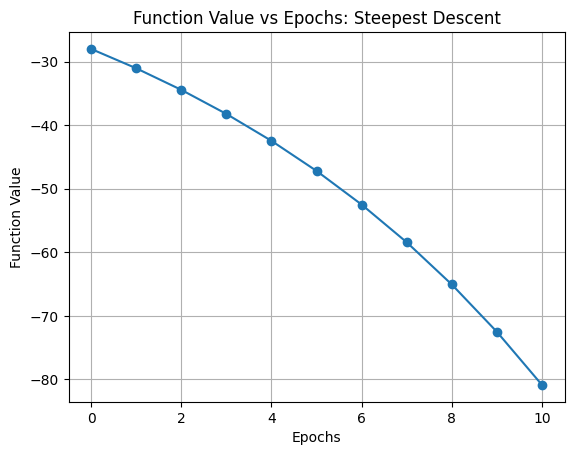

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs+1), function_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Function Value')
plt.title('Function Value vs Epochs: Steepest Descent')
plt.grid(True)
plt.show()

In [ ]:
def steepest_ascent(function,starting_point, epochs):
    X_new = [starting_point[0]]
    Y_new = [starting_point[1]]
    function_values = [lambdify((x, y), function)(X_new[0], Y_new[0])]

    for i in range(epochs):
        grad_x, grad_y = gradient(function, X_new[-1], Y_new[-1])
        x_new = X_new[-1] + learning_rate * grad_x
        y_new = Y_new[-1] + learning_rate * grad_y

        X_new.append(x_new)
        Y_new.append(y_new)
        function_values.append(lambdify((x, y), function)(x_new, y_new))
    return X_new, Y_new, function_values

epochs=10
starting_point=np.array([2,-2])
X, Y, function_values = steepest_ascent(function,starting_point, epochs)
print("X values:", X)
print("Y values:", Y)


X values: [2, 1.8599999999999999, 1.7293999999999998, 1.6076019999999998, 1.4940454999999997, 1.3882051577999996, 1.2895885929259996, 1.1977343275683396, 1.112209855987074, 1.0326098343719843, 0.958554383644516]
Y values: [-2, -1.9, -1.8034, -1.710038, -1.61976122, -1.5324255406, -1.4478949782100001, -1.3660411927165401, -1.286743025586526, -1.2098860665149247, -1.1353622468409064]


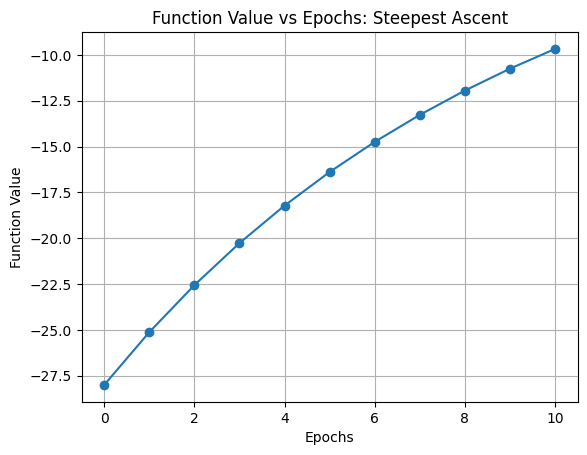

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs+1), function_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Function Value')
plt.title('Function Value vs Epochs: Steepest Ascent')
plt.grid(True)
plt.show()

**Newton Method**

In [ ]:
from sympy import symbols, hessian, pprint, Matrix
x, y = symbols('x y')
function = x*y + 4*y - 3*x**2 - y**2
H = hessian(function, (x, y))
X_val=1
Y_val=-1
H_evaluated = H.subs({x: X_val, y: Y_val})
print("Hessian matrix:")
pprint(H_evaluated)

Hessian matrix:
⎡-6  1 ⎤
⎢      ⎥
⎣1   -2⎦


In [ ]:
def hessian_matrix(function):
    H = hessian(function, (x, y))
    return H

def Newton_Method(function, starting_point,epochs):
    X_new = [starting_point[0]]
    Y_new = [starting_point[1]]
    function_values = [lambdify((x, y), function)(X_new[0], Y_new[0])]

    for i in range(epochs):
        grad_x, grad_y = gradient(function, X_new[-1], Y_new[-1])
        H = hessian_matrix(function)
        H_inv = H.inv()
        update_vector = H_inv * Matrix([[grad_x], [grad_y]])
        x_new = X_new[-1] - update_vector[0]
        y_new = Y_new[-1] - update_vector[1]
        X_new.append(x_new)
        Y_new.append(y_new)
        function_values.append(lambdify((x, y), function)(x_new, y_new))
    return X_new, Y_new, function_values


epochs=10
starting_point=np.array([1,-1])
X, Y, function_values = Newton_Method(function,starting_point, epochs)
print("X values:", X)
print("Y values:", Y)


X values: [1, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11]
Y values: [-1, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11]


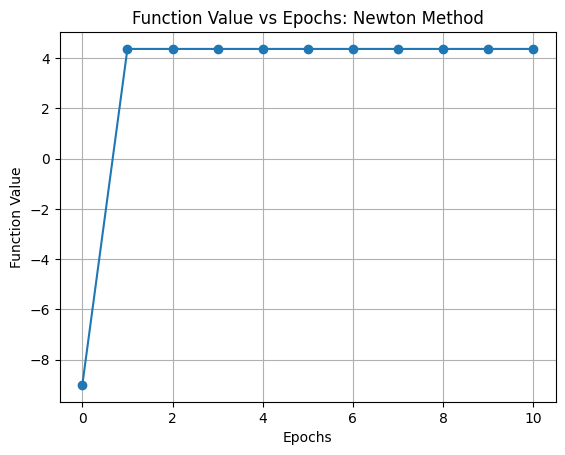

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs+1), function_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Function Value')
plt.title('Function Value vs Epochs: Newton Method')
plt.grid(True)
plt.show()

In [ ]:
def Newton_Method(function, epochs):
    X_new = [1]
    Y_new = [-1]
    function_values = [lambdify((x, y), function)(X_new[0], Y_new[0])]

    for i in range(epochs):
        grad_x, grad_y = gradient(function, X_new[-1], Y_new[-1])
        H = hessian_matrix(function)
        H_inv = H.inv()
        update_vector = H_inv * Matrix([[grad_x], [grad_y]])
        print("Update vector:", update_vector)
        x_new = X_new[-1] - update_vector[0]
        y_new = Y_new[-1] - update_vector[1]
        print("New X:", x_new)
        print("New Y:", y_new)
        X_new.append(x_new)
        Y_new.append(y_new)
        function_values.append(lambdify((x, y), function)(x_new, y_new))
    return X_new, Y_new, function_values


epochs = 10
X, Y, function_values = Newton_Method(function, epochs)
print("X values:", X)
print("Y values:", Y)


Update vector: Matrix([[7/11], [-35/11]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
Update vector: Matrix([[0], [0]])
New X: 4/11
New Y: 24/11
X values: [1, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11, 4/11]
Y values: [-1, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11, 24/11]


In [ ]:
 grad_x, grad_y = gradient(function, 4/11, 24/11)
 grad_x

0.0

# Conclusion:

**Gradient Descent:**

Gradient descent converges to a local minimum of the function. It iteratively updates its position in the direction of the steepest descent, meaning it finds a point where the function's value is lower than its immediate neighbors. However, it may not find the global minimum (the absolute lowest point) if there are multiple valleys in the function's landscape.

**Gradient Ascent:**

Gradient ascent converges to a local maximum of the function. It works similarly to gradient descent, but uses the negative gradient to move towards the steepest ascent, ultimately reaching a point where the function's value is higher than its immediate neighbors. This method does not guarantee finding the global maximum (the absolute highest point) either.

**Newton's Method:**

Newton's method can converge to a local minimum, maximum, or saddle point of the function, depending on the initial guess and the curvature of the function at that point. It uses the gradient and the Hessian (matrix of second-order derivatives) to take larger steps in the direction of the optimum. However, it requires careful consideration as:
It may not converge if the starting guess is far from the optimum.
It may diverge if the Hessian is singular or poorly conditioned.